In [120]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Ir para pasta Dados
local = os.getcwd()
os.chdir('./dados')


In [4]:
pwd

'/home/miguel/Apps/Data_Science_Python_GIT/03_Modelo_Lorentz_Reflection_Loss/dados'

In [40]:
#Pegar os arquivos
TXT =[arquivos for arquivos in os.listdir(local+'/dados') if arquivos[len(arquivos)-4:] == '.txt']

df = []

for txt in TXT:
    df.append(pd.read_csv(txt, sep= '\t', skipinitialspace = True))

In [107]:
df[0].max()

f(GHz)    12.39
e'         0.05
e"         0.11
u'         0.05
u"         0.11
tan_e     83.53
tan_u     83.53
RL        -0.01
RL_med    -0.32
Zin       10.63
S11        1.00
S21        0.10
A          0.40
R          1.00
T          0.01
SEt       43.64
SEr       27.96
SEa       15.98
SEmr      -0.13
dtype: float64

In [99]:
df[0]["e'"].head()

0    0.01
1    0.01
2    0.01
3    0.01
4    0.01
Name: e', dtype: float64

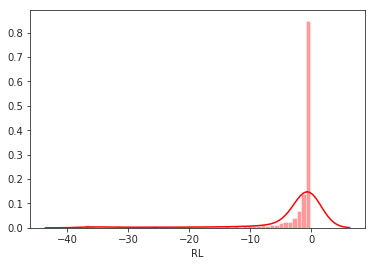

In [185]:
sns.distplot(
    a = df[3]['RL'],
    color = 'red'
)

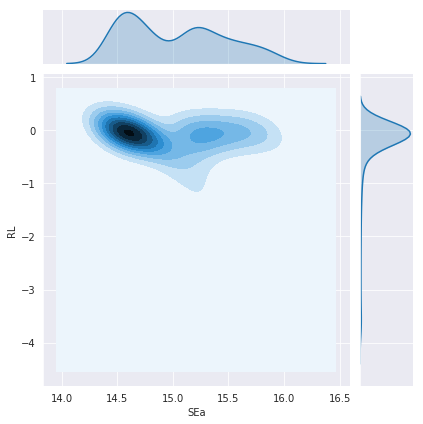

In [126]:
sns.set_style(
    'darkgrid'
)
sns.jointplot(
    x=df[0]["SEa"],
    y=df[0]['RL'],
    kind = 'kde',
    #ylim= [-0.1,0.1],
    #xlim =[8.2,12.4]
)

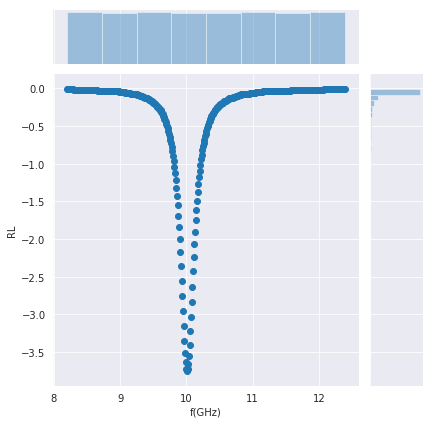

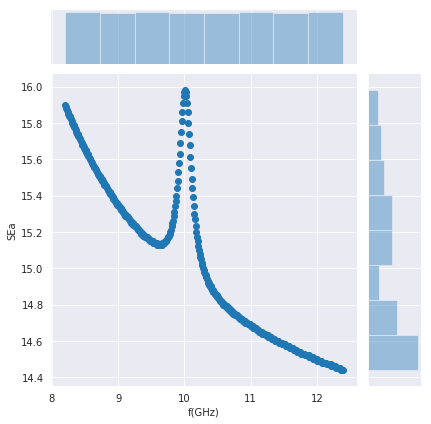

In [125]:
sns.set_style(
    'darkgrid'
)
sns.jointplot(
    x=df[0]["f(GHz)"],
    y=df[0]['RL'],
    kind = 'scatter',
    #ylim= [-0.1,0.1],
    #xlim =[8.2,12.4]
)

sns.jointplot(
    x=df[0]["f(GHz)"],
    y=df[0]['SEa'],
    kind = 'scatter',
    #ylim= [-0.1,0.1],
    #xlim =[8.2,12.4]
)


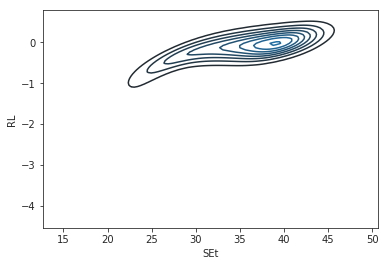

In [150]:
sns.set_style(
    'ticks'
)
sns.kdeplot(
    data = df[0]['SEt'],
    data2 = df[0]['RL'],
    kernel = 'gau',
    bw = 'scott'
)


In [161]:
df[0][['SEt','RL']].head()

,SEt,RL
0,43.64,-0.01
1,43.56,-0.01
2,43.49,-0.01
3,43.42,-0.01
4,43.34,-0.01


In [173]:
new = df[0][["e'",'e"','RL']]
new2 = df[1][["e'",'e"','RL']]
new2.head()
new.head()

,e',"e""",RL
0,0.03,0.0,-0.05
1,0.03,0.0,-0.05
2,0.03,0.0,-0.05
3,0.03,0.0,-0.05
4,0.03,0.0,-0.05


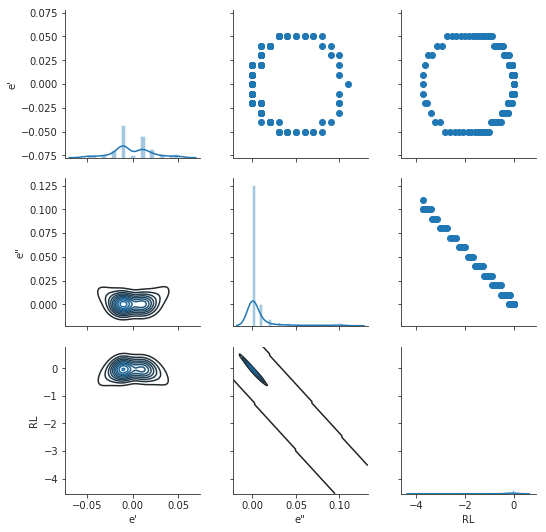

In [170]:
g = sns.PairGrid(new)

#Plotar Mapas na Diagonais
g.map_diag(sns.distplot)

#Plotar Mapas superior
g.map_upper(plt.scatter)

#Plotar Mapas Inferiores
g.map_lower(sns.kdeplot)

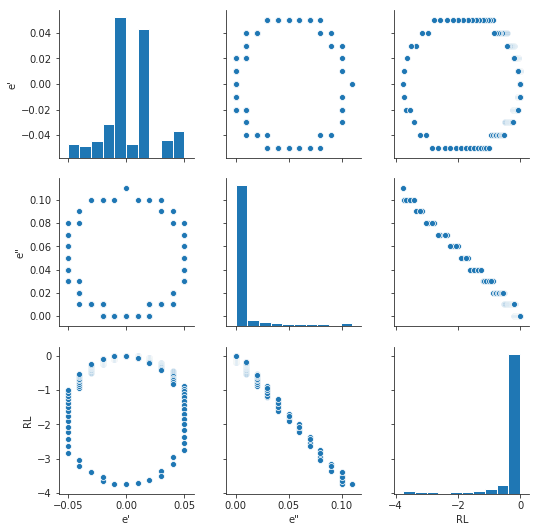

In [175]:
sns.pairplot(
    data = new,
)

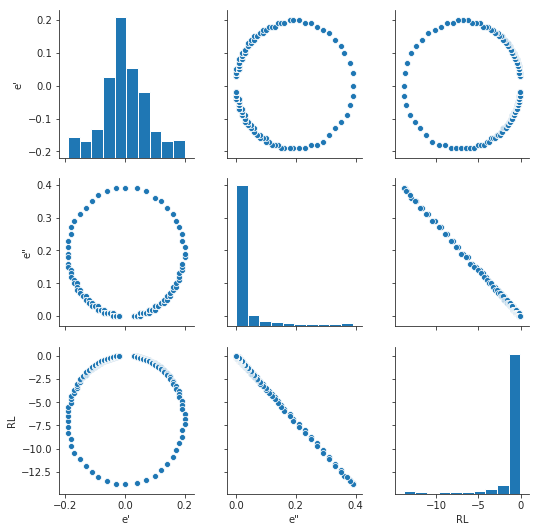

In [196]:
sns.set_color_codes(
    palette='dark'
)

sns.pairplot(
    data = new2,
)


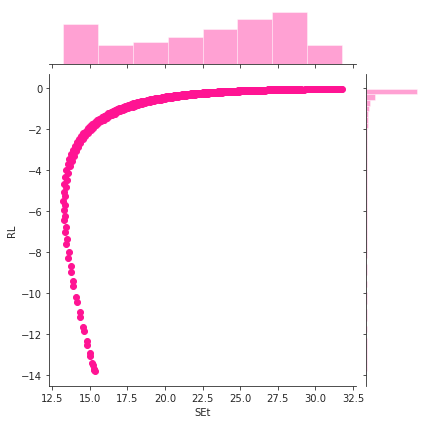

In [203]:
sns.jointplot("SEt", "RL", data=df[1], kind="scatter", color="#FF1493")

### Breve análise:

Rapidamente deu para observar que os métodos de 2 portas e 1 porta não tem nenhuma relação, tratam-se de duas medidas distindas. Portanto, não há como relacionar a atenuação máxima de um com a do outro. Apesar disso,através da extração de dados por ambos (S11 e S21) os métodos é possível, através do modelo teórico de linha de transmissão, um ao outro.